# Importing Libraries

In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, read csv file.
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

### Load dataset to pandas dataframe

In [60]:
df = pd.read_csv('HIV_dataset.csv')

### View dataframe

In [61]:
df.head(8)

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,UNMARRIED,NO,College Degree,YES,NO,Bar,Heterosexual,YES,POSITIVE
1,20,UNMARRIED,NO,College Degree,NO,YES,NaN,Heterosexual,NO,NEGATIVE
2,23,Married,YES,College Degree,NO,YES,NaN,Bisexual,NO,NEGATIVE
3,24,Married,NO,College Degree,YES,YES,Park,Heterosexual,YES,POSITIVE
4,18,UNMARRIED,YES,Senior High School,YES,NO,Internet,Heterosexual,YES,POSITIVE
5,15,UNMARRIED,YES,Junior High School,NO,NO,Public bath,Bisexual,NO,NEGATIVE
6,15,UNMARRIED,YES,Junior High School,NO,NO,Public Bath,Heterosexual,YES,NEGATIVE
7,15,UNMARRIED,NO,Junior High School,YES,NO,Public Bath,Bisexual,NO,POSITIVE


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             698 non-null    int64 
 1   Marital Staus                   698 non-null    object
 2   STD                             698 non-null    object
 3   Educational Background          698 non-null    object
 4   HIV TEST IN PAST YEAR           698 non-null    object
 5   AIDS education                  698 non-null    object
 6   Places of seeking sex partners  676 non-null    object
 7   SEXUAL ORIENTATION              698 non-null    object
 8   Drug- taking                    698 non-null    object
 9   Result                          698 non-null    object
dtypes: int64(1), object(9)
memory usage: 54.7+ KB


In [63]:
# See if there are any missing values in the dataset
df.isnull().sum()

Age                                0
Marital Staus                      0
STD                                0
Educational Background             0
HIV TEST IN PAST YEAR              0
AIDS education                     0
Places of seeking sex partners    22
SEXUAL ORIENTATION                 0
Drug- taking                       0
Result                             0
dtype: int64

In [64]:
df.head(8)

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,UNMARRIED,NO,College Degree,YES,NO,Bar,Heterosexual,YES,POSITIVE
1,20,UNMARRIED,NO,College Degree,NO,YES,NaN,Heterosexual,NO,NEGATIVE
2,23,Married,YES,College Degree,NO,YES,NaN,Bisexual,NO,NEGATIVE
3,24,Married,NO,College Degree,YES,YES,Park,Heterosexual,YES,POSITIVE
4,18,UNMARRIED,YES,Senior High School,YES,NO,Internet,Heterosexual,YES,POSITIVE
5,15,UNMARRIED,YES,Junior High School,NO,NO,Public bath,Bisexual,NO,NEGATIVE
6,15,UNMARRIED,YES,Junior High School,NO,NO,Public Bath,Heterosexual,YES,NEGATIVE
7,15,UNMARRIED,NO,Junior High School,YES,NO,Public Bath,Bisexual,NO,POSITIVE


# Analyze dataset

### Plot result collumm 

In [65]:
# normalizing the result column

def normalize_result(x: str):
    if x.lower() == 'positive':
        return "Positive"
    else:
        return 'Negative'
    
df['Result'] = df['Result'].apply(normalize_result)

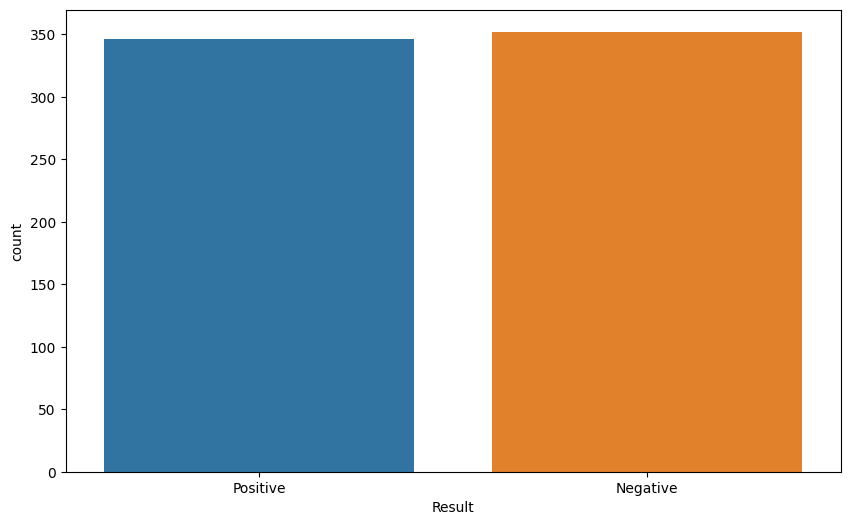

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Result', hue="Result")
plt.show()

### Plot how STD effect the result

In [67]:
# normalizing the STD column

def normalize_std(x: str):
    if x.lower() == "yes":
        return "Yes"
    else:
        return "No"
    
df["STD"] = df["STD"].apply(normalize_std)

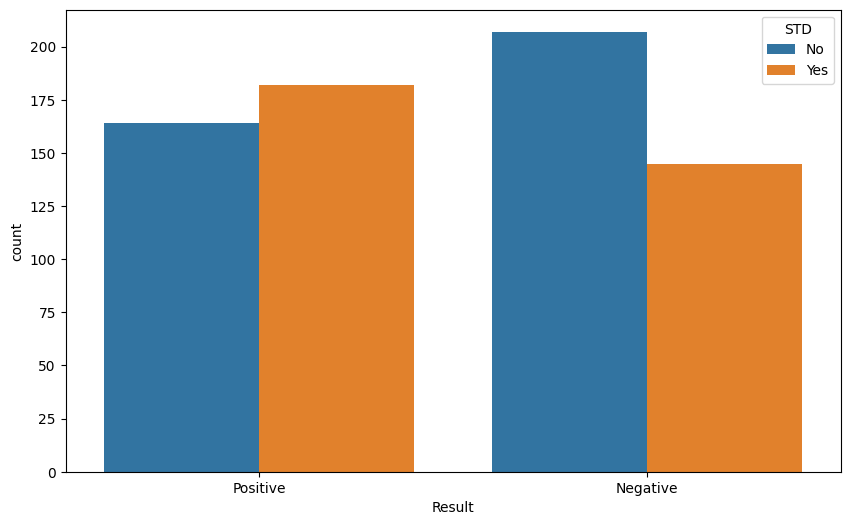

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Result', hue="STD")
plt.show()

### Plot how Places of seeking sex partners effect HIV

In [69]:
df['Places of seeking sex partners'].replace(pd.NA,'Others',inplace=True)

C:\Users\emonr\AppData\Local\Temp\ipykernel_13652\2988063103.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Places of seeking sex partners'].replace(pd.NA,'Others',inplace=True)


In [70]:
def normalize_spe(x: str):
    if x.lower() == 'bar':
        return 'Bar'
    elif x.lower() == 'park':
        return 'Park'
    elif x.lower() == 'internet':
        return 'Internet'
    elif x.lower() == 'public bath':   
        return 'Public Bath'
    else:
        return 'Others'
    
df["Places of seeking sex partners"] = df["Places of seeking sex partners"].apply(normalize_spe)

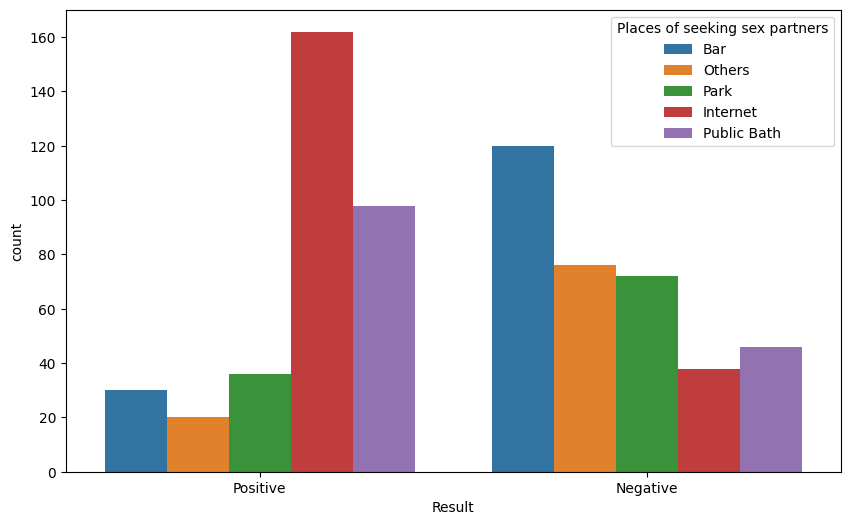

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Result', hue='Places of seeking sex partners')
plt.show()